In [1]:
import tensorflow as tf
from sklearn.datasets import load_sample_image
import numpy as np 
import matplotlib.pyplot as plt 

def draw_image(img):
    plt.imshow(img)
    plt.show()
    

- sample image load

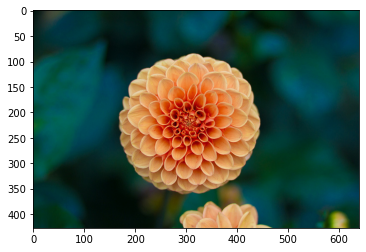

In [2]:
china = load_sample_image("china.jpg")/255
flower = load_sample_image("flower.jpg")/255
images = np.array([china, flower])

draw_image(images[1])

## 14.6 VGG 구현하기 

- 이미지넷 데이터셋에서 사전훈련된 VGG16 모델 로드 

In [3]:
model = tf.keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', classifier_activation='softmax')


- 모델이 기대하는 픽셀 크기로 변환 (224 x 224)

In [4]:
images_resized = tf.image.resize(images, [224, 224])
print(images_resized)

tf.Tensor(
[[[[6.80449069e-01 7.86331415e-01 9.03978467e-01]
   [6.82352960e-01 7.88235307e-01 9.05882359e-01]
   [6.85272276e-01 7.91154623e-01 9.08801675e-01]
   ...
   [9.70404387e-01 9.74325955e-01 9.93933797e-01]
   [9.78247523e-01 9.82169092e-01 9.99540448e-01]
   [9.82169092e-01 9.86090660e-01 1.00000000e+00]]

  [[6.83762252e-01 7.89644599e-01 9.07291651e-01]
   [6.82654977e-01 7.88537323e-01 9.06184375e-01]
   [6.84865236e-01 7.90747583e-01 9.08394635e-01]
   ...
   [9.81801450e-01 9.85723019e-01 9.98590708e-01]
   [9.86261427e-01 9.90182996e-01 1.00000000e+00]
   [9.88235295e-01 9.92156863e-01 1.00000000e+00]]

  [[6.83394611e-01 7.87193656e-01 9.01960790e-01]
   [6.87316179e-01 7.91115224e-01 9.05882359e-01]
   [6.90209270e-01 7.94008255e-01 9.08775389e-01]
   ...
   [9.86397088e-01 9.89276946e-01 9.95036781e-01]
   [9.89276946e-01 9.95036781e-01 9.92156863e-01]
   [9.85355377e-01 9.91115212e-01 9.88235295e-01]]

  ...

  [[5.10635495e-01 5.09471297e-01 1.58749133e-01]
   [4

- 모델에 적절한 방식으로 전처리해주기 
    preprocess_input() 함수는 픽셀값이 0~255 사이라고 가정하기 때문에, 위에서 image 그릴 때 255로 나눠줬으니까 다시 255 곱해주기

In [5]:
inputs = tf.keras.applications.vgg16.preprocess_input(images_resized*255)

- 사전 훈련된 모델을 통해 예측 수행
    
    통상적인 구조대로 출력 Y_proba는 행이 하나의 이미지이고 열이 하나의 클래스 (여기에는 1000개의 클래스)
    
    최상위 K개의 예측을 클래스 이름과 예측 클래스의 추정 확률을 출력하려면 decode_predictions() 함수를 사용.
    각 이미지에 대해 최상위 K걔의 예측을 담긴 리스트를 반환하는데, 각 예측은 클래스 아이디, 이름, 확률을 포함한 튜플*.
    *tuple = 셀 수 있는 수량의 순서있는 열거 

In [6]:
Y_proba = model.predict(inputs)
top_K = tf.keras.applications.vgg16.decode_predictions(Y_proba, top = 3)

In [7]:
for image_index in range(len(images)):
    print("image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print(" {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()

image #0
 n03781244 - monastery    28.64%
 n04346328 - stupa        21.22%
 n03877845 - palace       18.43%

image #1
 n11939491 - daisy        18.03%
 n02206856 - bee          5.54%
 n07720875 - bell_pepper  5.27%



## Extra - 14.7 사전훈련된 모델을 사용한 전이 학습

충분하지 않은 훈련 데이터로 이미지 분류기를 훈련하려면, 11장에서 언급한 것처럼 사전훈련된 모델의 하위층을 사용하는 것이 좋다. 
교재에서는 Xception 모델을 사용해 꽃 이미지를 분류하는 모델을 훈련했는데, 나는 ResNet을 써보겠음 

In [8]:
import tensorflow_datasets as tfds

In [11]:
dataset, info = tfds.load("tf_flowers", as_supervised = True, with_info = True)
dataset_size = info.splits["train"].num_examples
class_names = info.features["label"].names
n_classes = info.features["label"].num_classes

- 이 데이터셋에는 train 셋만 있기 때문에 데이터셋의 처음 10%를 테스트 세트로 사용하고 다음 15%를 검증세트, 나머지 75%는 훈련 세트로 나눔

In [14]:
test_split, valid_split, train_split = tfds.load([10, 15, 75])

test_set = tfds.load("tf_flowers", split = test_split, as_supervised=True)
valid_set = tfds.load("tf_flowers", split = valid_split, as_supervised=True)
train_set = tfds.load("tf_flowers", split = train_split, as_supervised=True)

AttributeError: 'Split' object has no attribute 'subsplit'